In [ ]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
TRAIN_DIR = "/content/drive/My Drive/Signature_classify/train"
TEST_DIR = "/content/drive/My Drive/Signature_classify/test"
BATCH_SIZE = 64 #number of data to train in one iteration

In [ ]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.png'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 5 in folder User1
For training data, found 5 in folder User4
For training data, found 5 in folder User5
For training data, found 5 in folder User2
For training data, found 5 in folder User3


In [ ]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.png'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 5 in folder User5
For testing data, found 5 in folder User4
For testing data, found 5 in folder User2
For testing data, found 5 in folder User3
For testing data, found 5 in folder User1


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [ ]:
class_names = ['User1','User2','User3','User4','User5']

Image shape (92, 206, 3)
Image shape (92, 206, 3)
Image shape (131, 256, 3)
Image shape (131, 256, 3)
Image shape (105, 227, 3)
Image shape (88, 191, 3)
Image shape (109, 257, 3)
Image shape (51, 141, 3)
Image shape (105, 249, 3)
Image shape (90, 184, 3)
Image shape (92, 206, 3)
Image shape (91, 135, 3)
Image shape (107, 230, 3)
Image shape (92, 206, 3)
Image shape (92, 206, 3)


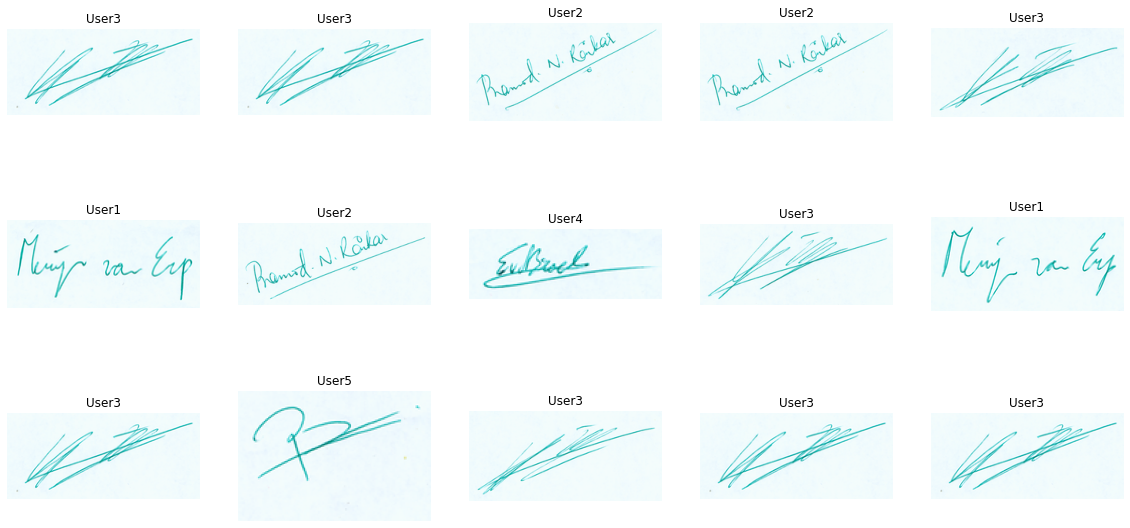

In [ ]:
plt.figure(figsize=(20,10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/My Drive/Signature_classify/train/", target_class=class_name)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high 
#for our model to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor 

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, #slants the shape of the object - normal shearing
                                   zoom_range = 0.2, #zooms the image
                                   horizontal_flip = True) #flips both rows and coloumns horizontally

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128), #image size
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical') #used to split output in terms of classes

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 25 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [ ]:
# Initialising the CNN
classifier = Sequential() #used to create the model layer by layer

# Step 1 - Convolution - has input image of size 128 x 128
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu')) #this is the convolution layer that has a kernel of 3x3 and activation function as relu

# Step 2 - Pooling = down sampling of an image = training on a disproportionately low subset of the majority class examples
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening = Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 5, activation = 'softmax')) # has 5 output nodes as there are 5 classes

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
## model summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [ ]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('identify_sign.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.7853 - accuracy: 0.2000 - val_loss: 4.4659 - val_accuracy: 0.2000
Epoch 2/50
1/1 [==============================] - 1s 746ms/step - loss: 4.2986 - accuracy: 0.2000 - val_loss: 4.6768 - val_accuracy: 0.2000
Epoch 3/50
1/1 [==============================] - 1s 739ms/step - loss: 4.4966 - accuracy: 0.2000 - val_loss: 3.6614 - val_accuracy: 0.2000
Epoch 4/50
1/1 [==============================] - 1s 725ms/step - loss: 3.5338 - accuracy: 0.2000 - val_loss: 2.6508 - val_accuracy: 0.2000
Epoch 5/50
1/1 [==============================] - 1s 727ms/step - loss: 2.5864 - accuracy: 0.2000 - val_loss: 1.9269 - val_accuracy: 0.4000
Epoch 6/50
1/1 [==============================] - 1s 729ms/step - loss: 1.9047 - accuracy: 0.4000 - val_loss: 1.6565 - val_accuracy: 0.2000
Epoch 7/50
1/1 [==============================] - 1s 724ms/step - loss: 1.6587 - accuracy: 0.2000 - val_loss: 1.6029 - val_accuracy: 0.2000
Epoch 8/50
1/1 [=======

In [ ]:
classifier.evaluate(test_set)

1/1 [==============================] - 0s 334ms/step - loss: 0.1310 - accuracy: 1.0000


[0.13095298409461975, 1.0]

Text(0, 0.5, 'Loss')

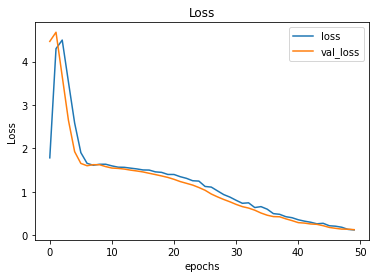

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')